# Classification

Classification - Sınıflandırma Cevabı evet hayır olan sorular için classification modelleri kullanırız
Bu çalışmada büyük bir şirketin çalışanlarından kimlerin işten ayrılacağını tahmin eden model geliştireceğiz

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns',100)  # 100 tane stün gösterir
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

AttributeError: module 'matplotlib.cm' has no attribute 'register_cmap'

### READ DATA

In [3]:
df=pd.read_csv('hr_data.csv')

## EDA - Exploration data analysis

In [4]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,2,5993.0,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,1,5130.0,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,2,2090.0,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,1,2909.0,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,1,3468.0,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,No


In [5]:
# İşten ayrılıp ayrılmıyacağının cevabı evet-hayır olduğu için bu bir classification problemidir


In [6]:
df.sample()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
270,55,Travel_Rarely,452,Research & Development,1,3,Medical,1,374,4,Male,81,3,5,Manager,1,2,19045.0,18938,0,Y,Yes,14,3,3,80,0,37,2,3,36,10,4,13,No


In [7]:
df.info()   #Attrion da boş data var

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   BusinessTravel            1470 non-null   object 
 2   DailyRate                 1470 non-null   int64  
 3   Department                1470 non-null   object 
 4   DistanceFromHome          1470 non-null   int64  
 5   Education                 1470 non-null   int64  
 6   EducationField            1470 non-null   object 
 7   EmployeeCount             1470 non-null   int64  
 8   EmployeeNumber            1470 non-null   int64  
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1470 non-null   int64  
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   int64  
 14  JobRole 

In [8]:
sns.countplot(x=df['Attrition'])    # İşten ayrılanlar

NameError: name 'sns' is not defined

In [9]:
# Classification modeli olduğu için yes- no yazıyor bunları 1 ve 0 çevirmemiz gerekiyor

In [10]:
d={'No':0,'Yes':1}    # Bir sözlük tanımladık

In [11]:
df['Attrition']=df['Attrition'].map(d)     # Map for döngüsünün yeni hali yes yazanları 1 no yazanları 0 yapacak

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   BusinessTravel            1470 non-null   object 
 2   DailyRate                 1470 non-null   int64  
 3   Department                1470 non-null   object 
 4   DistanceFromHome          1470 non-null   int64  
 5   Education                 1470 non-null   int64  
 6   EducationField            1470 non-null   object 
 7   EmployeeCount             1470 non-null   int64  
 8   EmployeeNumber            1470 non-null   int64  
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1470 non-null   int64  
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   int64  
 14  JobRole 

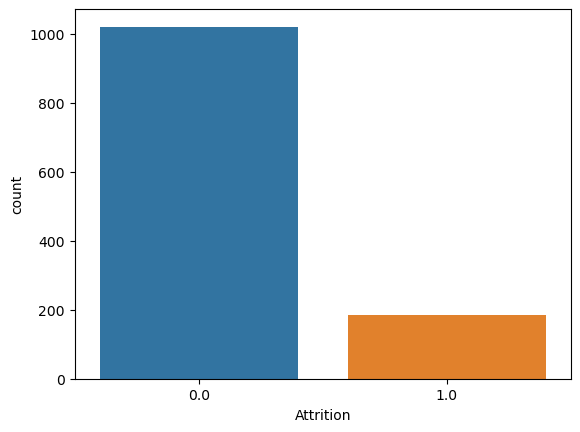

In [15]:
sns.countplot(x=df['Attrition']);   

In [16]:
df['Attrition'].value_counts()   # Kaç tane olduğunu buluyoruz

0.0    1020
1.0     185
Name: Attrition, dtype: int64

In [17]:
df.isnull().sum()    # Boş verileri görüyoruz bu 265 boş veriyi modelden ayırıp sonrasında tahmin ettireceğiz

Age                           0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInC

In [18]:
bos=df[df['Attrition'].isnull()]
dolu=df[df['Attrition'].notnull()]   # Boş ve dolu stünları ayırdık

In [19]:
bos.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
367,50,Travel_Rarely,1046,Research & Development,10,3,Technical Degree,1,491,4,Male,100,2,3,Healthcare Representative,4,2,9587.987822,2755,6,Y,No,15,3,4,80,0,20,2,3,4,3,1,3,NaN
368,40,Travel_Rarely,575,Sales,22,2,Marketing,1,492,3,Male,68,2,2,Sales Executive,3,1,5910.500884,6110,2,Y,Yes,12,3,1,80,2,8,6,3,6,4,1,0,NaN
369,31,Travel_Rarely,408,Research & Development,9,4,Life Sciences,1,493,3,Male,42,2,1,Research Scientist,2,2,2611.940519,7551,0,Y,Yes,16,3,4,80,0,3,5,3,2,2,2,2,NaN
370,21,Travel_Rarely,156,Sales,12,3,Life Sciences,1,494,3,Female,90,4,1,Sales Representative,2,2,1963.485226,25422,1,Y,No,15,3,4,80,0,1,0,3,1,0,0,0,NaN
371,29,Travel_Rarely,1283,Research & Development,23,3,Life Sciences,1,495,4,Male,54,3,1,Research Scientist,4,2,2761.033309,18168,9,Y,No,16,3,4,80,0,6,4,3,3,2,1,2,NaN


In [20]:
dolu.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,2,5993.0,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1.0
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,1,5130.0,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0.0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,2,2090.0,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1.0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,1,2909.0,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0.0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,1,3468.0,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0.0


In [21]:
x=dolu.drop('Attrition',axis=1)   # Dolu stünundan Attritionları çıkardık kalanını x e eşitledik
y=dolu[['Attrition']]      # Attritionları y ye eşitledik

In [24]:
x=pd.get_dummies(x, drop_first=True)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [28]:
g=GaussianNB()
b=BernoulliNB()

In [29]:
g.fit(x_train,y_train)

GaussianNB()

In [30]:
b.fit(x_train,y_train)

BernoulliNB()

In [34]:
gtahmin=g.predict(x_test)    # Tahmin ettirdik

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [36]:
accuracy_score(y_test,gtahmin)    # Başarı oranı

0.7883817427385892

In [37]:
btahmin=b.predict(x_test)

In [38]:
accuracy_score(y_test,btahmin)

0.8257261410788381

In [39]:
confusion_matrix(y_test,btahmin)   # 192-7 doğru 19-23 yanlış

array([[192,  19],
       [ 23,   7]], dtype=int64)

In [40]:
confusion_matrix(y_test,gtahmin)    # 171-19 doğru 11-40 yanlış

array([[171,  40],
       [ 11,  19]], dtype=int64)

<AxesSubplot:>

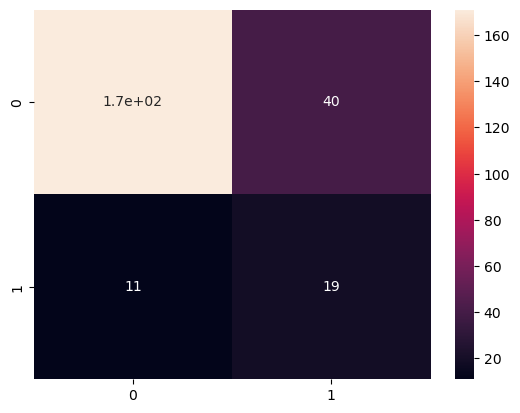

In [42]:
sns.heatmap(confusion_matrix(y_test,gtahmin),annot=True)

In [43]:
print(classification_report(y_test,gtahmin))    # Bütün sonuçları görebiliyoruz

              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87       211
         1.0       0.32      0.63      0.43        30

    accuracy                           0.79       241
   macro avg       0.63      0.72      0.65       241
weighted avg       0.86      0.79      0.82       241



In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
L=LogisticRegression()

In [46]:
L.fit(x_train,y_train)

LogisticRegression()

In [48]:
Ltahmin=L.predict(x_test)

In [50]:
accuracy_score(y_test,Ltahmin)

0.8672199170124482

<AxesSubplot:>

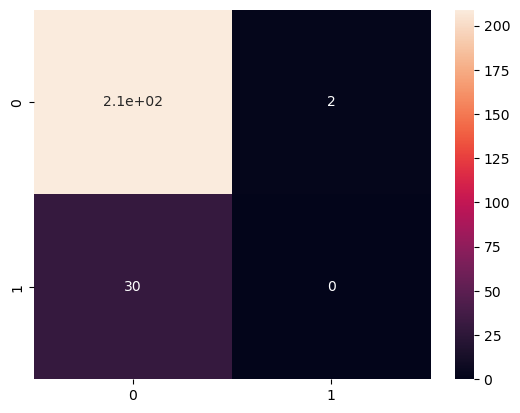

In [51]:
sns.heatmap(confusion_matrix(y_test,Ltahmin),annot=True)    #210 ve 0 doğru, 2 ve 30 yanlış tahmin

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
d=DecisionTreeClassifier()

In [54]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [55]:
dtahmin=d.predict(x_test)

In [56]:
accuracy_score(y_test,dtahmin)

0.8049792531120332

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
h=GradientBoostingClassifier()

In [59]:
h.fit(x_train,y_train)

GradientBoostingClassifier()

In [60]:
htahmin=h.predict(x_test)

In [61]:
accuracy_score(y_test,htahmin)    # Boostingde bir çok karar ağacını denediği için daha yüksek çıkması beklenir

0.8879668049792531

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()
ab= AdaBoostClassifier()
mn= MultinomialNB()

def algo_test(x, y):
    modeller=[ b, l, d, r, gb, kn, ab, mn]
    isimler=["BernoulliNB", "LogisticRegression", "DecisionTreeClassifier", 
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier",
             "AdaBoostClassifier", "MultinomialNB"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state = 42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model=model.fit(x_train,y_train)
        tahmin=model.predict(x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin, average="micro"))
        recall.append(recall_score(y_test, tahmin, average="micro"))
        f1.append(f1_score(y_test, tahmin, average="micro"))
        print(confusion_matrix(y_test, tahmin))

    print("Eğitim tamamlandı.")
    
    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision  
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model=metrics.iloc[0,-1]
    tahmin=model.predict(np.array(x_test) if model==kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, tahmin))
    print("classification Report:")
    print(classification_report(y_test, tahmin))
    print("Diğer Modeller:")
    
    return metrics.drop("Model", axis=1)

In [64]:
algo_test(x,y)

Veriler hazır modeller deneniyor
BernoulliNB()  modeli eğitiliyor!..
[[290  27]
 [ 31  14]]
LogisticRegression()  modeli eğitiliyor!..
[[315   2]
 [ 45   0]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[273  44]
 [ 32  13]]
RandomForestClassifier()  modeli eğitiliyor!..
[[317   0]
 [ 42   3]]
GradientBoostingClassifier()  modeli eğitiliyor!..
[[312   5]
 [ 36   9]]
KNeighborsClassifier()  modeli eğitiliyor!..
[[306  11]
 [ 45   0]]
AdaBoostClassifier()  modeli eğitiliyor!..
[[304  13]
 [ 33  12]]
MultinomialNB()  modeli eğitiliyor!..
[[164 153]
 [ 15  30]]
Eğitim tamamlandı.
En başarılı model:  GradientBoostingClassifier
Confusion Matrix:
[[312   5]
 [ 36   9]]
classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       317
         1.0       0.64      0.20      0.31        45

    accuracy                           0.89       362
   macro avg       0.77      0.59      0.62       362
weighted avg       0.87      0.

,Accuracy,Precision,Recall,F1
GradientBoostingClassifier,0.886740,0.886740,0.886740,0.886740
RandomForestClassifier,0.883978,0.883978,0.883978,0.883978
AdaBoostClassifier,0.872928,0.872928,0.872928,0.872928
LogisticRegression,0.870166,0.870166,0.870166,0.870166
KNeighborsClassifier,0.845304,0.845304,0.845304,0.845304
BernoulliNB,0.839779,0.839779,0.839779,0.839779
DecisionTreeClassifier,0.790055,0.790055,0.790055,0.790055
MultinomialNB,0.535912,0.535912,0.535912,0.535912
